# Study cases from Robot dance paper

In [3]:
import os
import pandas as pd
import numpy as np
import datetime

import run_robot
import prepare_data
from importlib import reload
reload(prepare_data)
reload(run_robot)

Loading PyJulia module...
Loading PyJulia module... Ok!
Loading Robot-dance Julia module...
Loading Robot-dance Julia module... Ok!
Loading modules...
Loading modules... Ok!
Loading Julia library...
Loading Julia library... Ok!
Loading Robot-dance Julia module...
Loading Robot-dance Julia module... Ok!


<module 'run_robot' from '/home/pjssilva/documentos/pesquisa/robot_dance/code/run_robot.py'>

In [4]:
# Define the basic data for the case studies

# Compute initial values for first run and read the cities and other initial data
basic_prm = prepare_data.save_basic_parameters(min_level=0.8)

# Compute initial values and read mobility matrix
# For cities
# cities_data = prepare_data.compute_initial_condition_evolve_and_save(basic_prm, "SP", ["Araçatuba", "São José Do Rio Preto"], 50000, 1)
# M = prepare_data.convert_mobility_matrix_and_save(cities_data, max_neighbors=3, drs=False)
# For DRS
cities_data = prepare_data.compute_initial_condition_evolve_and_save(basic_prm, "SP", [], 1, 1, "data/covid_with_drs.csv")
M = prepare_data.convert_mobility_matrix_and_save(cities_data, max_neighbors=3, drs=True)

1/22 Araraquara
2/22 Araçatuba
3/22 Baixada Santista
4/22 Barretos
5/22 Bauru
6/22 Campinas
7/22 Franca
8/22 Marília
9/22 Mun. São Paulo
10/22 Piracicaba
11/22 Presidente Prudente
12/22 Registro
13/22 Ribeirão Preto
14/22 Sorocaba
15/22 Sub região leste - RMSP
16/22 Sub região norte - RMSP
17/22 Sub região oeste - RMSP
18/22 Sub região sudeste - RMSP
19/22 Sub região sudoeste - RMSP
20/22 São José do Rio Preto
21/22 São João da Boa Vista
22/22 Taubaté
Simulating Araraquara until 2020-07-21
Simulating Araçatuba until 2020-07-21
Simulating Baixada Santista until 2020-07-21
Simulating Barretos until 2020-07-21
Simulating Bauru until 2020-07-21
Simulating Campinas until 2020-07-21
Simulating Franca until 2020-07-21
Simulating Marília until 2020-07-21
Simulating Mun. São Paulo until 2020-07-21
Simulating Piracicaba until 2020-07-21
Simulating Presidente Prudente until 2020-07-21
Simulating Registro until 2020-07-21
Simulating Ribeirão Preto until 2020-07-21
Simulating Sorocaba until 2020-07

In [29]:
# Create a target matrix (max infected level)
ncities, ndays = len(cities_data.index), int(basic_prm["ndays"])
target = 0.01*np.ones((ncities, ndays))
target = prepare_data.save_target(cities_data, target)

# Use a forcedif that releases the cities in the end
force_dif = np.ones((ncities, ndays))
force_dif[:-1, 288:] = 0.0
force_dif[-1, 149:] = 0.0

## Case 1: 14 day window, official data

## Case 2: 14 day window, correct sub-notification by 12x

In [37]:
basic_prm["hammer_duration"] = 14*6
basic_prm["rep"] = 1.4
basic_prm["min_level"] = 0.8
target = 0.002*np.ones((ncities, ndays))
target = prepare_data.save_target(cities_data, target)
run_robot.prepare_optimization(basic_prm, cities_data, M, target, force_dif)

CPU times: user 17min 51s, sys: 9min 47s, total: 27min 39s
Wall time: 2min 27s


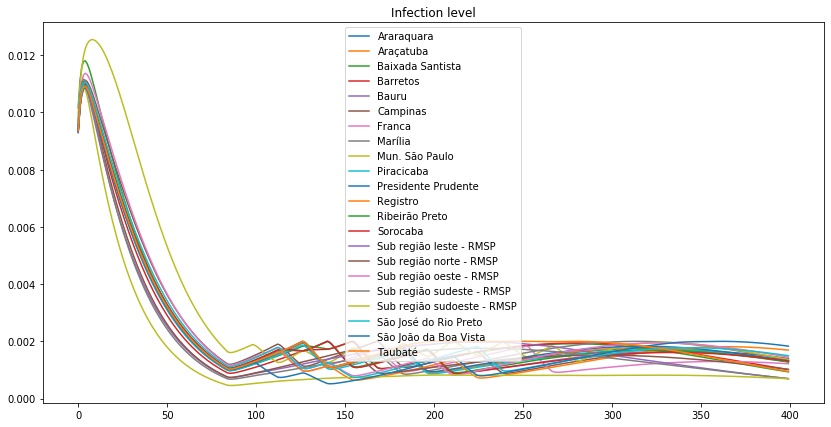

In [38]:
%%time
run_robot.optimize_and_show_results("results/window_14_rti.png", "results/window_14_rti.png",
                                    "results/window_14_rti.csv", cities_data.index)

In [45]:
sol1 = pd.read_csv("results/window_14.csv", index_col=[0, 1])
(sol1.loc["Mun. São Paulo", "rt"] >= 1.99).sum()

288

In [47]:
sol2 = pd.read_csv("results/window_14_rti.csv", index_col=[0, 1])
(sol2.loc["Mun. São Paulo", "rt"] >= 1.29).sum()

218

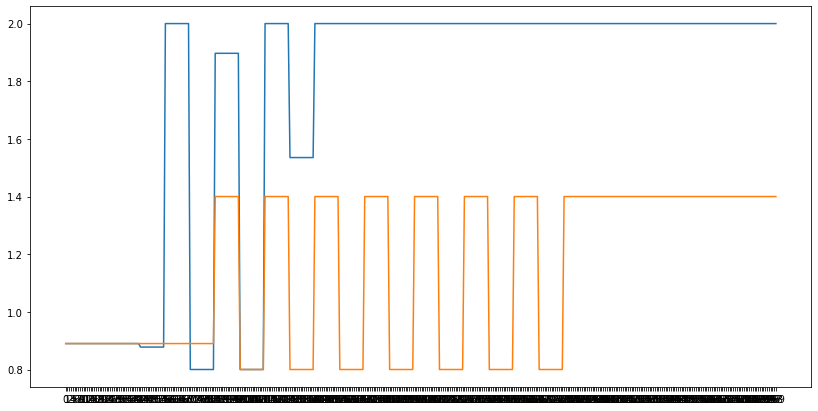

In [48]:
import matplotlib.pylab as plt
plt.plot(sol1.loc["Mun. São Paulo", "rt"])
plt.plot(sol2.loc["Mun. São Paulo", "rt"])